# TP: MNIST with Neural Networks (NN)

---
## **Mohamed MOHAMED EL BECHIR & Alexendre MALLEZ**
---

In [1]:
import numpy as np
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.18.0
Using keras version 3.8.0


## Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets. Check the size of the training and testing sets. 

<div class='alert alert-block alert-info'>
            Code:</div>

In [2]:
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


The MNIST database contains 60,000 training images and 10,000 testing images.
Using the pyplot package, visualize the first sample of the training set:

<div class='alert alert-block alert-info'>
            Code:</div>

Label of first training sample: 5


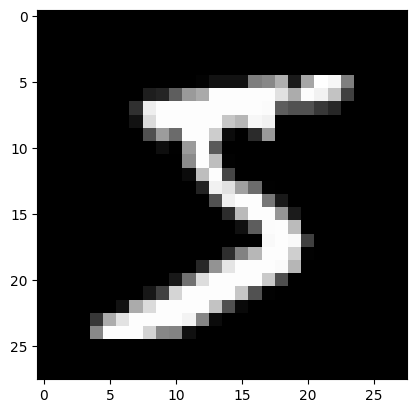

In [3]:
# Let us visualize the first training sample using the Matplotlib library with the imshow function
from matplotlib import pyplot as plt
# The first training sample is a 28x28 pixel image
plt.imshow(train_images[0], cmap='gray')
print("Label of first training sample: " + str(train_labels[0]))
plt.show()



The database contains images of handwritten digits. Hence, they belong to one of 10 categories, depending on the digit they represent. 
Reminder: in order to do multi-class classification, we use the softmax function, which outputs a multinomial probability distribution. That means that the output to our model will be a vector of size $10$, containing probabilities (meaning that the elements of the vector will be positive sum to $1$).
For easy computation, we want to true labels to be represented with the same format: that is what we call **one-hot encoding**. For example, if an image $\mathbf{x}$ represents the digit $5$, we have the corresponding one_hot label (careful, $0$ will be the first digit): 
$$ \mathbf{y} = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] $$
Here, you need to turn train and test labels to one-hot encoding using the following function: 

<div class='alert alert-block alert-info'>
            Code:</div>

In [4]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


Images are black and white, with size $28 \times 28$. We will work with them using a simple linear classification model, meaning that we will have them as vectors of size $(784)$.
You should then transform the images to the size $(784)$ using the numpy function ```reshape```.

Then, after casting the pixels to floats, normalize the images so that they have zero-mean and unitary deviation. Be careful to your methodology: while you have access to training data, you may not have access to testing data, and must avoid using any statistic on the testing dataset.

<div class='alert alert-block alert-info'>
            Code:</div>

In [5]:
# Reshape images to vectors of pixels
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0], img_rows * img_cols)
test_images = test_images.reshape(test_images.shape[0], img_rows * img_cols)
print("Training images have shape " + str(train_images.shape))
print("Test images have shape " + str(test_images.shape))



# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?

# Normalization is done by subtracting the mean and dividing by the standard deviation
train_images -= np.mean(train_images)
train_images /= np.std(train_images)
test_images -= np.mean(test_images)
test_images /= np.std(test_images)
# Check the mean and standard deviation of the training data
print("Mean of training data: " + str(np.mean(train_images)))
print("Standard deviation of training data: " + str(np.std(train_images)))
# Check the mean and standard deviation of the test data
print("Mean of test data: " + str(np.mean(test_images)))
print("Standard deviation of test data: " + str(np.std(test_images)))


Training images have shape (60000, 784)
Test images have shape (10000, 784)
Mean of training data: -3.4560264e-07
Standard deviation of training data: 0.9999998
Mean of test data: -2.1918306e-07
Standard deviation of test data: 1.0


# First part: working with Numpy

Look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf) for some basic information on how to use numpy.

### Defining the model 

We will here create a simple, linear classification model. We will take each pixel in the image as an input feature (making the size of the input to be $784$) and transform these features with a weight matrix $\mathbf{W}$ and a bias vector $\mathbf{b}$. Since there is $10$ possible classes, we want to obtain $10$ scores. Then, 
$$ \mathbf{W} \in \mathbb{R}^{784 \times 10} $$
$$ \mathbf{b} \in \mathbb{R}^{10} $$

and our scores are obtained with:
$$ \mathbf{z} = \mathbf{W}^{T} \mathbf{x} +  \mathbf{b} $$

where $\mathbf{x} \in \mathbb{R}^{784}$ is the input vector representing an image.
We note $\mathbf{y} \in \mathbb{R}^{10}$ as the target one_hot vector. 

Here, you fist need to initialize $\mathbf{W}$ and $\mathbf{b}$ using ```np.random.normal``` and ```np.zeros```, then compute $\mathbf{z}$.
<div class='alert alert-block alert-info'>
            Code:</div>

In [6]:
# To avoid implementing a complicated gradient back-propagation,
# we will try a very simple architecture with one layer 
def initLayer(n_input,n_output):
    """
    Initialize the weights, return the number of parameters
    Inputs: n_input: the number of input units - int
          : n_output: the number of output units - int
    Outputs: W: a matrix of weights for the layer - numpy ndarray
           : b: a vector bias for the layer - numpy ndarray
           : nb_params: the number of parameters  - int
    """

    
    # Create W at the right size with a normal distribution
    W = np.random.normal(0, 1, (n_input, n_output))
    # Create b at the right size, with zeros
    b = np.zeros((1, n_output))
    nb_params = W.size + b.size
    return W, b, nb_params

In [7]:
n_training = train_images.shape[0] 
n_feature = train_images.shape[1] 
n_labels = 10
W, b, nb_params = initLayer(n_feature, n_labels)

<div class='alert alert-block alert-info'>
            Code:</div>

In [8]:
def forward(W, b, X):
    """
    Perform the forward propagation
    Inputs: W: the weights - numpy ndarray
          : b: the bias - numpy ndarray
          : X: the batch - numpy ndarray
    Outputs: z: outputs - numpy ndarray
    """

    z = np.dot(X, W) + b
    return z

### Computing the output 

To obtain classification probabilities, we use the softmax function:
$$ \mathbf{o} = softmax(\mathbf{z}) \text{         with          } o_i = \frac{\exp(z_i)}{\sum_{j=0}^{9} \exp(z_j)} $$

The usual difficulty with the softmax function is the possibility of overflow when the scores $z_i$ are already large. Since a softmax is not affected by a shift affecting the whole vector $\mathbf{z}$:
$$ \frac{\exp(z_i - c)}{\sum_{j=0}^{9} \exp(z_j - c)} =  \frac{\exp(c) \exp(z_i)}{\exp(c) \sum_{j=0}^{9} \exp(z_j)} = \frac{\exp(z_i)}{\sum_{j=0}^{9} \exp(z_j)}$$
what trick can we use to ensure we will not encounter any overflow ? 

**Réponse :**  
Pour éviter les risques d’overflow lors du calcul de la fonction softmax, on soustrait à chaque score $ z_i $ le maximum du vecteur $\mathbf{z} $, soit  $\max_j z_j$, avant d’appliquer l’exponentielle.

<div class='alert alert-block alert-info'>
            Code:</div>

In [9]:
def softmax(z):
    """
    Perform the softmax transformation to the pre-activation values
    Inputs: z: the pre-activation values - numpy ndarray
    Outputs: out: the activation values - numpy ndarray
    """
    
    z_max = np.max(z, axis=1, keepdims=True)
    e_z = np.exp(z - z_max)
    sum_e_z = np.sum(e_z, axis=1, keepdims=True)
    out = e_z / sum_e_z
    return out


### Making updates

We define a learning rate $\eta$. The goal is to be able to apply updates:
$$ \mathbf{W}^{t+1} = \mathbf{W}^{t} + \nabla_{\mathbf{W}} l_{MLE} $$

In order to do this, we will compute this gradient (and the bias) in the function ```update```. In the next function ```updateParams```, we will actually apply the update with regularization. 

Reminder: the gradient $\nabla_{\mathbf{W}} l_{MLE}$ is the matrix containing the partial derivatives 
$$ \left[\frac{\delta l_{MLE}}{\delta W_{ij}}\right]_{i=1..784, j=1..10} $$
**Remark**: Careful, the usual way of implementing this in python has the dimensions of $\mathbf{W}$ reversed compared to the notation of the slides.

Coordinate by coordinate, we obtain the following update: 
$$ W_{ij}^{t+1} = W_{ij}^{t} + \eta \frac{\delta l_{MLE}}{\delta W_{ij}} $$

Via the chain rule, we obtain, for an input feature $i \in [0, 783]$ and a output class $j \in [0, 9]$: $$\frac{\delta l_{MLE}}{\delta W_{ij}} = \frac{\delta l_{MLE}}{\delta z_{j}} \frac{\delta z_j}{\delta W_{ij}}$$ 

It's easy to compute that $\frac{\delta z_j}{\delta W_{ij}} = x_i$

We compute the softmax derivative, to obtain:
$$ \nabla_{\mathbf{z}} l_{MLE} = \mathbf{o} - \mathbf{y} $$

Hence, $\frac{\delta l_{MLE}}{\delta z_{j}} = o_j - y_j$ and we obtain that $$\frac{\delta l_{MLE}}{\delta W_{ij}} = (o_j - y_j) x_i$$

This can easily be written as a scalar product, and a similar computation (even easier, actually) can be done for $\mathbf{b}$. Noting $\nabla_{\mathbf{z}} l_{MLE} = \mathbf{o} - \mathbf{y}$ as ```grad``` in the following function, compute the gradients $\nabla_{\mathbf{W}} l_{MLE}$ and $\nabla_{\mathbf{b}} l_{MLE}$ in order to call the function ```updateParams```.

Note: the regularizer and the weight_decay $\lambda$ are used in ```updateParams```.

<div class='alert alert-block alert-info'>
            Code:</div>

In [10]:
def updateParams(param, grad_param, eta, regularizer=None, weight_decay=0.):
    """
    Perform the update of the parameters
    Inputs: param: the network parameters - ndarray
          : grad_param: the updates of the parameters - ndarray
          : eta: the step-size of the gradient descent - float
          : weight_decay: the weight-decay - float
    Outputs: the parameters updated - ndarray
    """
    if regularizer is None:
        param = param - eta * grad_param
        return param
    elif regularizer == 'L2':
        param = param - eta * (grad_param + weight_decay * param)
        return param
    else:
        raise NotImplementedError



The update rule is affected by regularization. We implement two cases: No regularization, or L2 regularization. Use the two possible update rules to implement the following function: <div class='alert alert-block alert-info'>
            Code:</div>

In [11]:
def update(eta, W, b, grad, X, regularizer, weight_decay):
    """
    Perform the update of the parameters
    Inputs: eta: the step-size of the gradient descent - float 
          : W: the weights - ndarray
          : b: the bias -  ndarray
          : grad: the gradient of the activations w.r.t. to the loss -  list of ndarray
          : X: the data -  ndarray
          : regularizer: 'L2' or None - the regularizer to be used in updateParams
          : weight_decay: the weight decay to be used in updateParams - float
    Outputs: W: the weights updated -  ndarray
           : b: the bias updated -  ndarray
    """
    grad_w = np.outer(grad,X.T).T      
    grad_b = grad
        
    W = updateParams(W, grad_w, eta, regularizer, weight_decay)
    b = updateParams(b, grad_b, eta, regularizer, weight_decay)
    return W, b

### Computing the Accuracy

Here, we simply use the model to predict the class (by taking the argmax of the output !) for every example in ```X```, and count the number of times the model is right, to output the accuracy.
<div class='alert alert-block alert-info'>
            Code:</div>

In [12]:
def computeAcc(W, b, X, labels):
    """
    Compute the loss value of the current network on the full batch
    Inputs: act_func: the activation function - function
          : W: the weights - list of ndarray
          : B: the bias - list of ndarray
          : X: the batch - ndarray
          : labels: the labels corresponding to the batch
    Outputs: loss: the negative log-likelihood - float
           : accuracy: the ratio of examples that are well-classified - float
    """ 
    # Forward propagation
    z = forward(W, b, X)
 
    # Compute the softmax and the prediction
    out = softmax(z)
    pred = np.argmax(out, axis=1)
    
    #Â Compute the accuracy
    accuracy = np.mean(np.argmax(labels, axis=1) == pred)
      
    return accuracy

### Preparing training

The following hyperparameters are given. Next, we can assemble all the function previously defined to implement a training loop. We will train the classifier on **one epoch**, meaning that the model will see each training example once. 

In [13]:
# Optimization
eta = 0.01
regularizer = 'L2'
weight_decay = 0.0001

# Training
log_interval = 5000

<div class='alert alert-block alert-info'>
            Code:</div>

0 0.05506666666666667 0.0586 0.01
5000 0.8157 0.8189 0.01
10000 0.8362 0.843 0.01
15000 0.8453833333333334 0.8532 0.01
20000 0.85445 0.8568 0.01
25000 0.872 0.878 0.01
30000 0.8592666666666666 0.8606 0.01
35000 0.8725333333333334 0.8747 0.01
40000 0.8734666666666666 0.8735 0.01
45000 0.8771833333333333 0.8814 0.01
50000 0.8737 0.8754 0.01
55000 0.8663333333333333 0.8704 0.01
Final result: 0.8663333333333333 0.8704 0.01


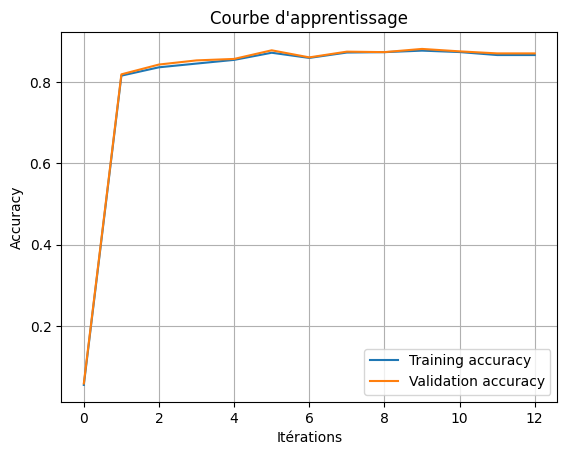

In [14]:
# Data structures for plotting
g_train_acc=[]
g_valid_acc=[]

#######################
### Learning process ##
#######################
for j in range(n_training):
    # Getting the example
    X, y = train_images[j], train_labels[j]

    # Forward propagation
    z = forward(W, b, X)

    # Compute the softmax
    out = softmax(z)
        
    # Compute the gradient at the top layer
    derror = out - y # This is o - y 

    # Update the parameters
    W, b = update(eta, W, b, derror, X, regularizer, weight_decay)

    if j % log_interval == 0:
        # Every log_interval examples, look at the training accuracy
        train_accuracy = computeAcc(W, b, train_images, train_labels) 

        # And the testing accuracy
        test_accuracy = computeAcc(W, b, test_images, test_labels) 

        g_train_acc.append(train_accuracy)
        g_valid_acc.append(test_accuracy)
        result_line = str(int(j)) + " " + str(train_accuracy) + " " + str(test_accuracy) + " " + str(eta)
        print(result_line)

g_train_acc.append(train_accuracy)
g_valid_acc.append(test_accuracy)
result_line = "Final result:" + " " + str(train_accuracy) + " " + str(test_accuracy) + " " + str(eta)
print(result_line)     

# Plot the results
plt.plot(g_train_acc, label='Training accuracy')
plt.plot(g_valid_acc, label='Validation accuracy')
plt.title("Courbe d'apprentissage")
plt.xlabel("Itérations")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()



What can you say about the performance of this simple linear classifier ?
<div class='alert alert-block alert-warning'>
            Answer:
            L’analyse du graphique montre que le classifieur linéaire progresse très vite dès les premières itérations, atteignant rapidement une bonne précision. Une fois autour de 90 %, les performances sur les ensembles d’entraînement et de test se stabilisent, ce qui indique que le modèle a vite convergé vers son meilleur niveau. La proximité des deux courbes montre aussi qu’il généralise bien, sans tomber dans le surapprentissage.</div>
        


# Second part: Autoencoder with Keras

## Autoencoder and PCA

First, we will try to connect the representation produced by Principal Component Analysis with what is learnt by a simple, linear, autoencoder. We will use the ```scikit-learn``` implementation of the ```PCA``` to obtain the two first components (hint: use the attribute ```.components_```), and visualize them:
<div class='alert alert-block alert-info'>
            Code:</div>

Text(0.5, 0, 'Second Principal Component')

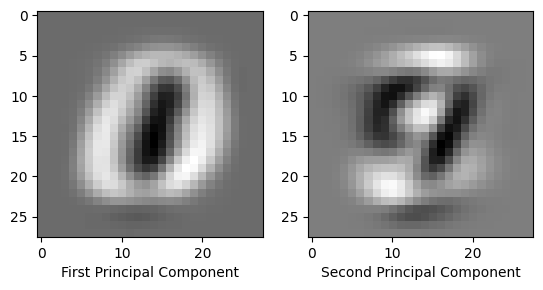

In [15]:
from sklearn.decomposition import PCA

# Let's find the first 2 PCA components
num_components = 2
pca = PCA(num_components).fit(train_images)

# Reshape so they resemble images and we can print them
eigen_mnist = pca.components_.reshape(num_components, img_rows, img_cols)

# Show the reshaped principal components
f, ax = plt.subplots(1,2)
ax[0].imshow(eigen_mnist[0], cmap='gray')
ax[0].set_xlabel('First Principal Component')
ax[1].imshow(eigen_mnist[1], cmap='gray')
ax[1].set_xlabel('Second Principal Component')

In [16]:
# Print the variance explained by those components
pca.explained_variance_

array([53.903343, 39.412003], dtype=float32)

Comment on the visualization in relation to the variance explained by only keeping the two principal components:
<div class='alert alert-block alert-warning'>
            Answer: En regardant les deux premières composantes principales, on voit qu’elles capturent les grandes variations de forme dans les chiffres MNIST. La première ressemble à un « 0 » et reflète surtout la structure générale (contours, épaisseur), tandis que la deuxième montre des détails plus fins comme l’inclinaison ou des traits intérieurs. Avec environ 93 % de la variance expliquée, elles couvrent l'essentiel des variations des données.</div>

### Implementing the Autoencoder with Keras

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

Now, we will use Keras to implement the autoencoder. You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

In this first case, we implement a **simple linear autoencoder**. Build it in order to have the same capacity as the PCA decomposition (2 hidden dimensions !) we made just above. 
<div class='alert alert-block alert-info'>
            Code:</div>

In [18]:
# Input layer
input_layer = Input(shape=(img_rows * img_cols,))

# Encoding layer
latent_view = Dense(num_components, name='latent_view')(input_layer)

# Decoding layer
output_layer = Dense(img_rows * img_cols, activation='sigmoid', name='output_layer')(latent_view)

ae_model = Model(input_layer, output_layer, name='ae_model')
ae_model.summary()

Model: "ae_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_view (Dense)             │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 784)            │         2,352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,922 (15.32 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

What loss shoud we use ? Choose the usual one and import it directly from Keras. You can use a simple ```SGD``` optimizer, and then compile the model; finally, train it to rebuild images from the original examples. 
<div class='alert alert-block alert-info'>
            Code:</div>

In [19]:
from tensorflow.keras.losses import MeanSquaredError
loss = MeanSquaredError()

optimizer = SGD(learning_rate=1e-1) 
ae_model.compile(optimizer=optimizer, loss=loss) 

batch_size = 128
epochs = 10

# No noise here - we want to train a simple auto-encoder and compare visually with PCA
history = ae_model.fit(train_images,
                       train_images,
                       epochs=epochs,
                       batch_size=batch_size,
                       verbose=1,
                       shuffle=True,
                       validation_data=(test_images, test_images)
                          )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 1.1380 - val_loss: 0.8028
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 0.8052 - val_loss: 0.7896
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.7918 - val_loss: 0.7719
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.7744 - val_loss: 0.7580
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.7614 - val_loss: 0.7508
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 0.7559 - val_loss: 0.7465
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.7525 - val_loss: 0.7443
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.7498 - val_loss: 0.7429
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.7489 - val_loss: 0.7419
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.7469 - val_loss: 0.7411


Assuming that the name of your layer (obtained through the command ```model.summary()```) is ```'layer'```, here is the way to obtained the weights. Visualize the weights of the encoder and compare them to the two components obtained through the PCA.

In [20]:
weights, bias = ae_model.get_layer('latent_view').get_weights()

<div class='alert alert-block alert-info'>
            Code:</div>

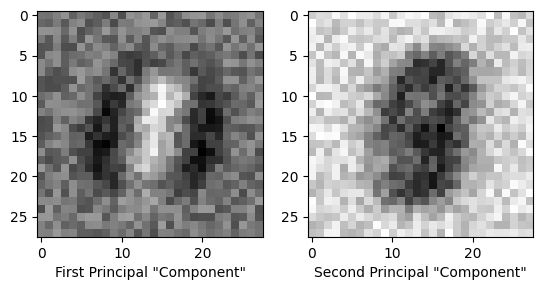

In [21]:
# Show the two dimensions of the encoder, in a similar manner to the principal components
# (after reshaping them as images !)
image_1=weights[:,0].reshape(28,28)
image_2=weights[:,1].reshape(28,28)

f, ax = plt.subplots(1,2)
ax[0].imshow(image_1, cmap='gray')
ax[0].set_xlabel('First Principal "Component"')
ax[1].imshow(image_2, cmap='gray')
ax[1].set_xlabel('Second Principal "Component"')
plt.show()



Now, visualize the images rebuilt by the network !
<div class='alert alert-block alert-info'>
            Code:</div>

[(0, 7708), (1, 7709), (2, 7710), (3, 7711), (4, 7712)]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step


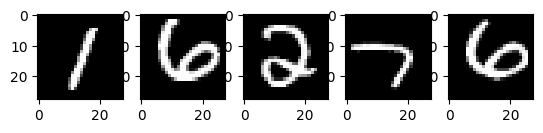

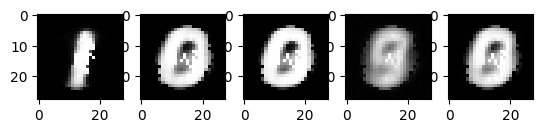

In [22]:
# Select a few images at random: look from n
n = np.random.randint(0,len(test_images)-5)

# Plot a few images from n
f, ax = plt.subplots(1,5)
print([(i,a) for i,a in enumerate(range(n,n+5))])
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(test_images[a].reshape(28,28),cmap='gray')

# Get the prediction from the model

pred_images=ae_model.predict(test_images)

# ... and plot them
f, ax = plt.subplots(1,5)
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(pred_images[a].reshape(28,28),cmap='gray')

Do the same ( = build a new model) with a latent dimension that is largely higher than 2. Compare the visualizations and the images that are rebuilt. 
<div class='alert alert-block alert-info'>
            Code:</div>

In [23]:
from sklearn.decomposition import PCA

# Let's find the first 2 PCA components
num_components = 100
pca = PCA(num_components).fit(train_images)

# Reshape so they resemble images and we can print them
eigen_mnist = pca.components_.reshape(num_components, img_rows, img_cols)


In [24]:
# Input layer
input_layer = Input(shape=(img_rows * img_cols,))

# Encoding layer
latent_view = Dense(num_components, name='latent_view')(input_layer)

# Decoding layer
output_layer = Dense(img_rows * img_cols, activation='sigmoid', name='output_layer')(latent_view)

ae_model = Model(input_layer, output_layer, name='ae_model')
ae_model.summary()


from tensorflow.keras.losses import MeanSquaredError
loss = MeanSquaredError()

optimizer = SGD(learning_rate=1e-1) 
ae_model.compile(optimizer=optimizer, loss=loss) 

batch_size = 128
epochs = 10

# No noise here - we want to train a simple auto-encoder and compare visually with PCA
history = ae_model.fit(train_images,
                       train_images,
                       epochs=epochs,
                       batch_size=batch_size,
                       verbose=1,
                       shuffle=True,
                       validation_data=(test_images, test_images)
                          )

Model: "ae_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_view (Dense)             │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 784)            │        79,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,684 (615.95 KB)

 Trainable params: 157,684 (615.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0478 - val_loss: 0.7665
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7597 - val_loss: 0.7135
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7106 - val_loss: 0.6760
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6745 - val_loss: 0.6518
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6518 - val_loss: 0.6347
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6373 - val_loss: 0.6218
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6233 - val_loss: 0.6117
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6154 - val_loss: 0.6036
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6072 - val_loss: 0.5966
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6004 - val_loss: 0.5905


[(0, 7071), (1, 7072), (2, 7073), (3, 7074), (4, 7075)]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step


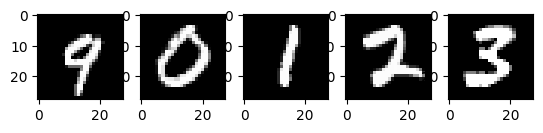

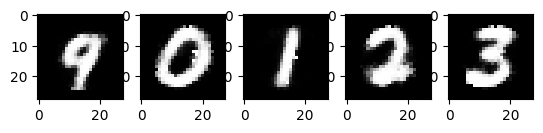

In [25]:
weights, bias = ae_model.get_layer('latent_view').get_weights()
# Select a few images at random: look from n
n = np.random.randint(0,len(test_images)-5)

# Plot a few images from n
f, ax = plt.subplots(1,5)
print([(i,a) for i,a in enumerate(range(n,n+5))])
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(test_images[a].reshape(28,28),cmap='gray')

# Get the prediction from the model

pred_images=ae_model.predict(test_images)

# ... and plot them
f, ax = plt.subplots(1,5)
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(pred_images[a].reshape(28,28),cmap='gray')

### De-noising Autoencoder

Now, we can implement a **de-noising autoencoder**. The following function will transform an array of images by adding it random noise. Create a new autoencoder model, this time with **more layers** and **non-linear activations** (like the ReLU) and train it to rebuild the de-noised images. Display some testing images, with noise, and re-built.

In [26]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )
    return noisy_array

In [27]:
# Create a copy of the data with added noise
noisy_train_images = noise(train_images)
noisy_test_images = noise(test_images)

<div class='alert alert-block alert-info'>
            Code:</div>

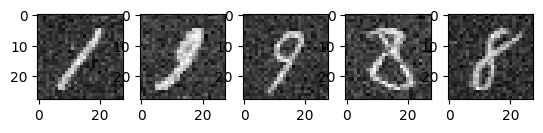

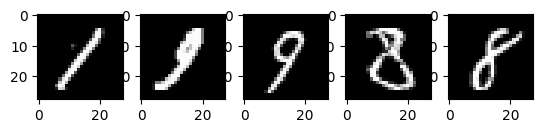

Model: "ae_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_view (Dense)             │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 784)            │        79,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,684 (615.95 KB)

 Trainable params: 157,684 (615.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9609 - val_loss: 0.6388
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6078 - val_loss: 0.5127
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5041 - val_loss: 0.4576
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4547 - val_loss: 0.4238
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4238 - val_loss: 0.4002
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4015 - val_loss: 0.3804
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3809 - val_loss: 0.3662
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3677 - val_loss: 0.3556
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3574 - val_loss: 0.3470
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3490 - val_loss: 0.3399
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3425 - val_loss: 0.3336
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

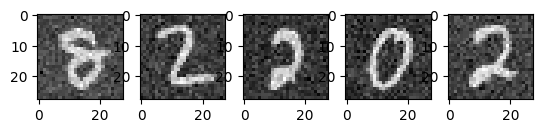

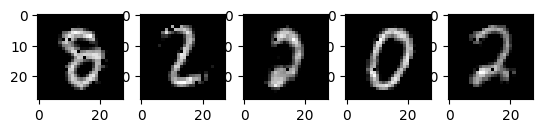

In [28]:
# Visualize some of the images with noise against the originals
f, ax = plt.subplots(1,5)
n = np.random.randint(0,len(test_images)-5)
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(noisy_train_images[a].reshape(28,28),cmap='gray')
f, ax = plt.subplots(1,5)
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(train_images[a].reshape(28,28),cmap='gray')

plt.show()

# Build a new model with more layers and Relu activations
# Input layer
input_layer = Input(shape=(img_rows * img_cols,))

# Encoding layer
latent_view = Dense(num_components, name='latent_view')(input_layer)

# Decoding layer
output_layer = Dense(img_rows * img_cols, activation='relu', name='output_layer')(latent_view)

ae_model = Model(input_layer, output_layer, name='ae_model')
ae_model.summary()


loss = MeanSquaredError()

optimizer = SGD(learning_rate=1e-1) 
ae_model.compile(optimizer=optimizer, loss=loss) 

batch_size = 256
epochs = 20


# Compile it but here, use noised data as inputs !

history = ae_model.fit(noisy_train_images,
                       train_images,
                       epochs=epochs,
                       batch_size=batch_size,
                       verbose=1,
                       shuffle=True,
                       validation_data=(noisy_test_images,test_images)
                          )

# Visualize the images rebuilt by the model !

f, ax = plt.subplots(1,5)
print([(i,a) for i,a in enumerate(range(n,n+5))])
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(noisy_test_images[a].reshape(28,28),cmap='gray')

# Get the prediction from the model

pred_images=ae_model.predict(noisy_test_images)

# ... and plot them
f, ax = plt.subplots(1,5)
for i,a in enumerate(range(n,n+5)):
    ax[i].imshow(pred_images[a].reshape(28,28),cmap='gray')


Historique des métriques : dict_keys(['loss', 'val_loss'])


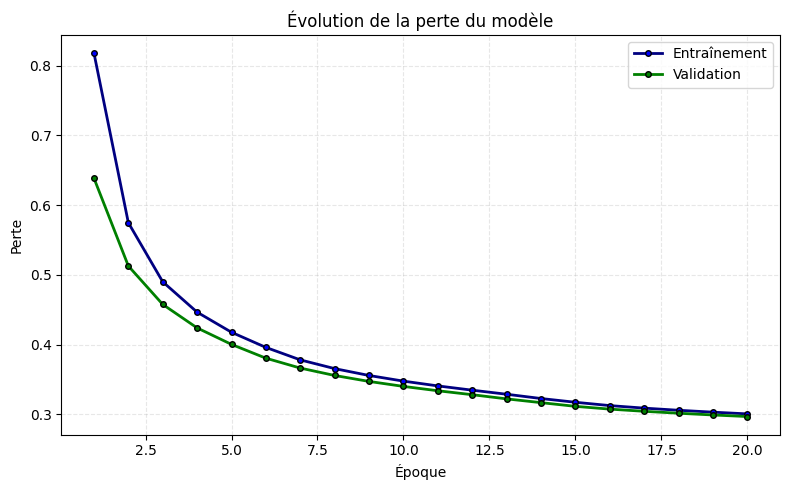

In [29]:
print("Historique des métriques :", history.history.keys())

plt.figure(figsize=(8, 5))
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], label='Entraînement', color='navy',
         linestyle='-', linewidth=2, marker='o', markersize=4,
         markerfacecolor='blue', markeredgecolor='black')

plt.plot(epochs, history.history['val_loss'], label='Validation', color='green',
         linestyle='-', linewidth=2, marker='o', markersize=4,
         markerfacecolor='green', markeredgecolor='black')

plt.title('Évolution de la perte du modèle')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Assuming that we normalize the images to be in the 0-1 range, what other loss function could we use ?
<div class='alert alert-block alert-warning'>
            Answer:
        
Si l’on normalise les images dans l’intervalle $[0, 1]$, une autre fonction de perte qu’on peut utiliser est la **binary cross-entropy (BCE)**.
Elle s’exprime comme suit :

$$
\mathcal{L}_{\text{BCE}} = -\sum_{i=1}^{N} \left[ y_i \log(o_i) + (1 - y_i) \log(1 - o_i) \right]
$$

où $ o_i $ désigne la sortie du modèle (probabilité prédite) et $ y_i $ la véritable étiquette. Contrairement à la MSE, la BCE prend mieux en compte les propriétés probabilistes des sorties, ce qui la rend plus efficace pour la classification.
</div>